In [10]:
using LinearAlgebra, Plots, Random

In [9]:
import Pkg; Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed LoggingExtras ──────────── v1.2.0
   Installed GR_jll ─────────────────── v0.73.18+0
   Installed Measures ───────────────── v0.3.3
   Installed Libmount_jll ───────────── v2.41.2+0
   Installed PlotUtils ──────────────── v1.4.4
   Installed OpenSSL ────────────────── v1.6.0
   Installed FFMPEG ─────────────────── v0.4.5
   Installed IrrationalConstants ────── v0.2.6
   Installed HTTP ───────────────────── v1.10.19
   Installed Pango_jll ──────────────── v1.57.0+0
   Installed DataStructures ─────────── v0.19.3
   Installed JSON ───────────────────── v1.2.1
   Installed libaom_jll ─────────────── v3.13.1+0
   Installed StatsBase ──────────────── v0.34.8
   Installed Xorg_xcb_util_cursor_jll ─ v0.1.6+0
   Installed Plots ──────────────────── v1.41.1
   Installed Libtiff_jll ────────────── v4.7.2+0
   Installed Expat_jll ──────────────── v2.7.3+0
   Installed MbedTLS_jll ────────────

In [13]:
function gauss_classic(A, b)
    n = size(A, 1)
    A_ext = hcat(A, b)
    
    # Прямой ход
    for k in 1:n-1
        for i in k+1:n
            factor = A_ext[i, k] / A_ext[k, k]
            for j in k:n+1
                A_ext[i, j] -= factor * A_ext[k, j]
            end
        end
    end
    
    # Обратный ход
    x = zeros(n)
    for i in n:-1:1
        x[i] = A_ext[i, n+1]
        for j in i+1:n
            x[i] -= A_ext[i, j] * x[j]
        end
        x[i] /= A_ext[i, i]
    end
    
    return x
end

gauss_classic (generic function with 1 method)

In [46]:
function CHOLESKY!(A)
    N = size(A, 1)
    
    # Первый столбец
    A[1,1] = sqrt(A[1,1])
    for J in 2:N
        A[J,1] = A[J,1] / A[1,1]
    end
    
    # Остальные столбцы
    for I in 2:N
        # Диагональный элемент
        S = A[I,I]
        for IP in 1:I-1
            S = S - A[I,IP] * A[I,IP]
        end
        A[I,I] = sqrt(S)
        
        # Внедиагональные элементы
        if I < N
            for J in I+1:N
                S = A[J,I]
                for IP in 1:I-1
                    S = S - A[I,IP] * A[J,IP]
                end
                A[J,I] = S / A[I,I]
            end
        end
    end
    
    # Обнуляем верхний треугольник
    for I in 1:N
        for J in I+1:N
            A[I,J] = 0.0
        end
    end
    
    return A
end

CHOLESKY! (generic function with 1 method)

In [3]:
function SOLVE_CHOLESKY(A, b)
    L = CHOLESKY(A)
    N = length(b)
    y = zeros(N)
    x = zeros(N)
    
    # Решение Ly = b
    for I in 1:N
        S = b[I]
        for K in 1:I-1
            S = S - L[I,K] * y[K]
        end
        y[I] = S / L[I,I]
    end
    
    # Решение L'x = y
    for I in N:-1:1
        S = y[I]
        for K in I+1:N
            S = S - L[K,I] * x[K]
        end
        x[I] = S / L[I,I]
    end
    
    return x
end

SOLVE_CHOLESKY (generic function with 1 method)

In [11]:
function generate_matrix(n)
    A = rand(n, n)
    return A * A' + n * I
end

generate_matrix (generic function with 1 method)

In [29]:
function compare_performance()
    dimensions = [3, 10, 100, 300]
    
    times_gauss = Float64[]
    times_cholesky = Float64[]
    
    Random.seed!(123)
    
    for n in dimensions
        println("Тестирование для n = $n")
        
        A = generate_matrix(n)
        b = rand(n)
        
        # Измеряем время выполнения метода Гаусса
        time_gauss = @elapsed begin
            x_gauss = gauss_classic(A, b)
        end
        
        # Измеряем время выполнения метода Холецкого
        time_cholesky = @elapsed begin
            x_cholesky = SOLVE_CHOLESKY(A, b)
        end
        
        push!(times_gauss, time_gauss)
        push!(times_cholesky, time_cholesky)
        
        residual_gauss = norm(A * x_gauss - b)
        residual_cholesky = norm(A * x_cholesky - b)
        
        println("  Метод Гаусса: $time_gauss секунд")
        println("  Метод Холецкого: $time_cholesky секунд")
        println("  Отношение времени (Гаусс/Холецкий): $(time_gauss/time_cholesky)")
        println()
    end
    
    return dimensions, times_gauss, times_cholesky
end

compare_performance (generic function with 1 method)

СРАВНЕНИЕ ПРОИЗВОДИТЕЛЬНОСТИ МЕТОДА ГАУССА И МЕТОДА ХОЛЕЦКОГО
Тестирование для n = 3
  Метод Гаусса: 1.833e-6 секунд
  Метод Холецкого: 1.75e-6 секунд
  Отношение времени (Гаусс/Холецкий): 1.0474285714285714

Тестирование для n = 10
  Метод Гаусса: 2.084e-6 секунд
  Метод Холецкого: 2.208e-6 секунд
  Отношение времени (Гаусс/Холецкий): 0.9438405797101449

Тестирование для n = 100
  Метод Гаусса: 0.000492792 секунд
  Метод Холецкого: 0.000305916 секунд
  Отношение времени (Гаусс/Холецкий): 1.6108735731377242

Тестирование для n = 300
  Метод Гаусса: 0.010113334 секунд
  Метод Холецкого: 0.006274792 секунд
  Отношение времени (Гаусс/Холецкий): 1.611740118238182



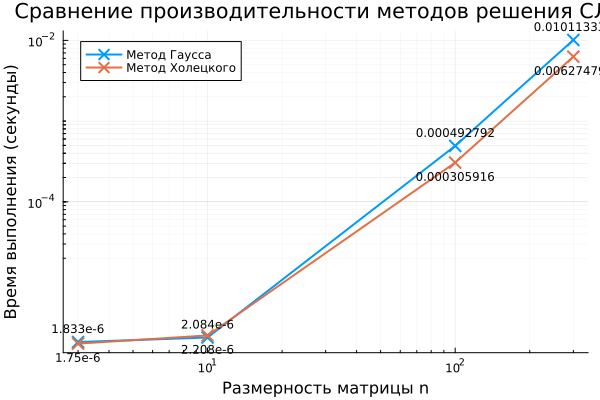

"/Users/egor/PycharmProjects/BMSTU-iu9/Numerical methods of LA/gauss_vs_cholesky_comparison.png"

In [45]:
println("СРАВНЕНИЕ ПРОИЗВОДИТЕЛЬНОСТИ МЕТОДА ГАУССА И МЕТОДА ХОЛЕЦКОГО")
dims, times_gauss, times_cholesky = compare_performance()

p = plot(dims, [times_gauss times_cholesky], 
     label=["Метод Гаусса" "Метод Холецкого"],
     linewidth=2,
     marker=:x,
     markersize=6,
     xlabel="Размерность матрицы n",
     ylabel="Время выполнения (секунды)",
     title="Сравнение производительности методов решения СЛАУ",
     xscale=:log10,
     yscale=:log10,
     minorgrid=true)

for i in 1:length(dims)
    annotate!(dims[i], times_gauss[i] * 1.2, text("$(times_gauss[i])", 8, :bottom))
    annotate!(dims[i], times_cholesky[i] * 0.8, text("$(times_cholesky[i])", 8, :top))
end

display(p)
savefig("gauss_vs_cholesky_comparison.png")